<a href="https://colab.research.google.com/github/lsaif/SwFractureEstimation/blob/master/SwfEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Load Data and Intitial Configuration**

In [80]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import os

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

source_dir = '/content/drive/My Drive/Swf/ProdChan/'
result_dir = '/content/drive/My Drive/Swf/Result/'

B = 1.23
visc_oil = 3.071
visc_water = 0.215
Swf_initial =[]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Modules to load, calculate, and plot data**

In [118]:
def LoadData(filename):
  db = pd.DataFrame()
  db = pd.read_csv(f"/{source_dir}/{filename}", sep=',', skiprows=2)
  db.columns =['Time','Date','Well','OilRate','LiquidRate','GasRate','WaterRate','WaterCut','GOR','WOR','WOR:','smoothing']
  db['Date'] = pd.to_datetime(db['Date'])
  return db

def CalculateSwf(data):
  Swf = []
  Well = data['Well'].any()
  Date = data['Date']
  Wor = data['WOR']
  Swf = visc_water*Wor/(B*visc_oil+visc_water*Wor)
  return Well, Date, Swf

def PlotData(well, date, swf, data):
  plt.clf()
  fig = plt.gcf()
  fig, (ax1, ax2) = plt.subplots(2)
  fig.set_size_inches(12, 7)
  plt.subplots_adjust(hspace=0.1)
  plt.suptitle(well, fontsize=20)

  ax1.tick_params(labelsize=10)
  ax1.set_xlabel("Year", fontsize=15)
  ax1.set_ylabel("Oil Rate", fontsize=15)
  oil = ax1.plot(date,data['OilRate'],label='Oil Rate', color='tab:green', marker='o', linewidth=0)
  
  ax1_2=ax1.twinx()
  ax1_2.set_ylim([0,1])
  ax1_2.set_ylabel("Water Cut", fontsize=15)
  wc = ax1_2.plot(date,data['WaterCut'],label='Water Cut', color='tab:blue', marker='o', linewidth=0)
  
  curve_list = wc+oil
  labels = [l.get_label() for l in curve_list]

  ax1.grid()
  ax1.legend(curve_list, labels, loc=2)
  
  ax2.set_ylim([0,1])
  ax2.tick_params(labelsize=10)
  ax2.set_xlabel("Year", fontsize=15)
  ax2.set_ylabel("Sw fracture", fontsize=15)  
  ax2.scatter(date,swf,label='Sw fracture', color='darkorange')
  ax2.grid()
  ax2.legend(loc=2)

  return plt.savefig(f"{result_dir}/{well}.png")

##**Run**

In [ ]:
for f in sorted(os.listdir(source_dir)):
  data = LoadData(f)
  well, date, swf = CalculateSwf(data)
  PlotData(well, date, swf, data)
  print(well)
print("Done")

JTB_175:V


<Figure size 432x288 with 0 Axes>

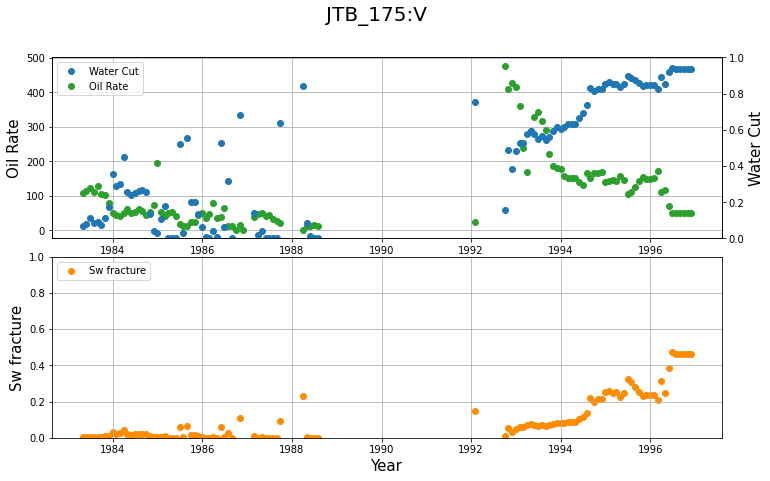

In [119]:
#Per Well
data = LoadData('JTB-175.csv')
data = data[data['Date']>'1981-08-01']
well, date, swf = CalculateSwf(data)
PlotData(well, date, swf, data)
print(well)